In [7]:
import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt

import sys
sys.path.append('/Users/thor/surfdrive/Projects/pymdna/')
import pymdna as mdna 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


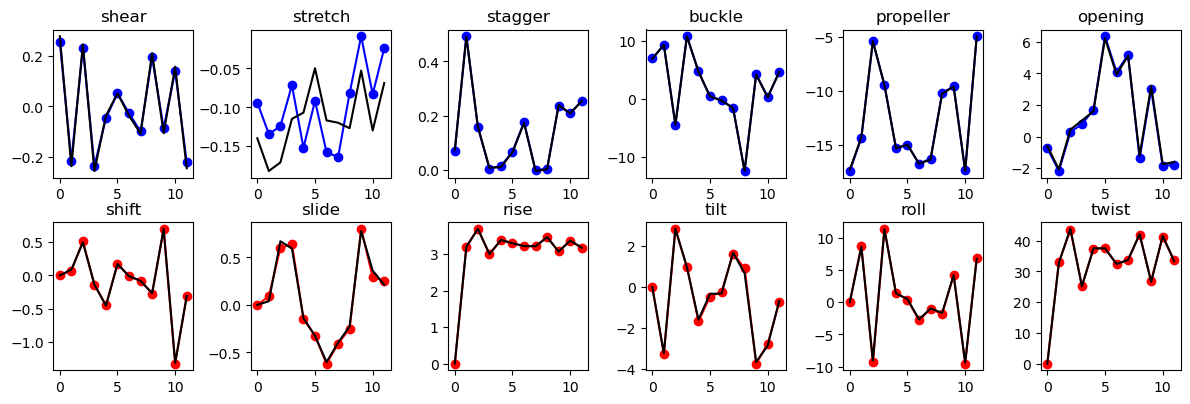

In [8]:
traj =  md.load('/Users/thor/surfdrive/Projects/pymdna/examples/analysis/test.pdb')
dna = mdna.NucleicFrames(traj)

ref = np.loadtxt('/Users/thor/surfdrive/Projects/pymdna/examples/analysis/ref.txt',skiprows=1)
params, names = dna.get_paramters()
params.shape, names

# Confidence intervals 
from scipy.stats import t

fig, ax = plt.subplots(2,6,figsize=(12,4))
fig.tight_layout()
ax = ax.flatten()
M = np.mean(params, axis=0)
S = np.std(params, axis=0)
n = params.shape[0]
ci = t.ppf(0.975, df=n-1) * S / np.sqrt(n)
x = np.arange(0, len(M))
for _, i in enumerate(M.T):
    if _ >= 6:
        c1, c2 = 'red','coral'
    else:
        c1, c2 = 'blue','cornflowerblue'
    ax[_].plot(i[::-1], '-o',color=c1)
    ax[_].fill_between(x, (i-ci[_])[::-1], (i+ci[_])[::-1], color=c2, alpha=0.2)
    ax[_].set_title(names[_])
    # if _ >= 6:
    #     ax[_].plot(x,-ref.T[_], '--', color='black')
    # else:
    ax[_].plot(x,ref.T[_], '-', color='black')

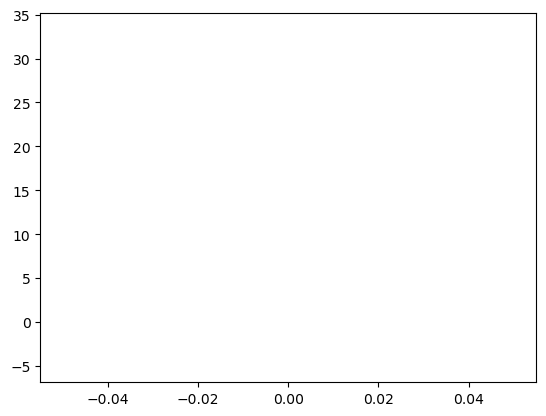

In [34]:
ref = np.loadtxt('/Users/thor/surfdrive/Projects/pymdna/examples/analysis/ref.txt',skiprows=1)
for i in ref[-1]:
    plt.plot(i)

Signature:
np.loadtxt(
    fname,
    dtype=<class 'float'>,
    comments='#',
    delimiter=None,
    converters=None,
    skiprows=0,
    usecols=None,
    unpack=False,
    ndmin=0,
    encoding='bytes',
    max_rows=None,
    *,
    quotechar=None,
    like=None,
)
Docstring:
Load data from a text file.

Parameters
----------
fname : file, str, pathlib.Path, list of str, generator
    File, filename, list, or generator to read.  If the filename
    extension is ``.gz`` or ``.bz2``, the file is first decompressed. Note
    that generators must return bytes or strings. The strings
    in a list or produced by a generator are treated as lines.
dtype : data-type, optional
    Data-type of the resulting array; default: float.  If this is a
    structured data-type, the resulting array will be 1-dimensional, and
    each row will be interpreted as an element of the array.  In this
    case, the number of columns used must match the number of fields in
    the data-type.
comments : str or